# Trabajo práctico Módulo 1
Exploración de Datos de Sitio de Ecommerce.<br>
El objetivo del Trabajo Práctico es realizar una Exploración de Datos completa sobre todo el dataset (todas las columnas).
Esta exploración involucra:

1. Entender el dominio del dataset. <br>
Para esto, hacerse algunas preguntas relevantes para el negocio, como por ejemplo:
  - ¿puede un usuario hacer compras sin acceder a ver primero el producto, o agregarlo al carrito? 
  - ¿Hay productos que sean comprados más de una vez por el mismo usuario? 
  - ¿cuántos usuarios abandonan el carrito? y otras similares. <br>
 El foco es entender lo más que se pueda el negocio.
2. Limpieza de datos.<br>
Involucra realizar acciones sobre todas las columnas de:
  - Revisión, eliminación o imputación de datos Nulos
  - Análisis de Nulos “no claros” (undefined? ceros? etc)
  - Evaluación de datos de outliers y análisis de los mismos, para decidir qué acción tomar.
  - Transformación de fechas, strings a numéricos y/o categórico y otras, en caso de ser necesario.
  - Limpieza de datos duplicados
  - Eliminación de datos innecesarios.
  - Análisis de Distribución Univariada de las columnas. 

3. Análisis de correlación y distribución multi-variada.
4. Elaboración de un proceso de tratamiento de datasets (suponga que le llega un dataset nuevo, el proceso debería realizar el mismo procesamiento realizado por Ud para obtener un dataset limpio y prolijo) Esto puede ser en un notebook o, idealmente, en código limpio (.py).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display_html
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [2]:
# Se monta un drive para acceder al data set.
# Mounting Drive into the Colab meaning that setting up the google drive account as a virtual drive 
# so that we can access the resources of the drive just like a local hard drive



In [3]:
#!pip install pyarrow
#!pip install fastparquet


In [4]:
# Lectura del dataset
df = pd.read_parquet('data-ecomm-10-19-smallsampled.parquet')
# Visualizaciión de las primeras 5 filas
display_html(df.head().style.hide_index())

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
2019-10-29 07:06:41 UTC,view,1004767,2053013555631882655,electronics.smartphone,samsung,243.220000,564343135,76be743b-f5cd-47a2-82eb-b489597df6ba
2019-10-03 06:05:30 UTC,view,26020177,2053013562644759347,None,None,9.050000,529412421,0ee743f2-1a41-4e6f-8d8e-cd38135032a0
2019-10-18 14:21:55 UTC,view,1307059,2053013558920217191,computers.notebook,apple,1569.920000,549727626,022640cb-f45a-4e76-9ade-3eeec65d7837
2019-10-13 08:46:22 UTC,view,12709948,2053013553559896355,None,triangle,36.940000,550305198,56ef2383-4c9d-4475-adcd-d4eeb4205fde
2019-10-31 02:05:01 UTC,view,1005160,2053013555631882655,electronics.smartphone,xiaomi,212.120000,535374900,a4ee5bfa-3824-4f66-87fb-0d0ae358f307


Se identifican 9 columnas:
1. *event_time*: Horario UTC 
2. *event_type*: View, Chart, Puchase 
3. *produc_id*: id de producto
4. *category_id*: id de categoría
5. *category_code*: categoría de producto (árbol con niveles)
6. *brand*: Marca
7. *price*: Precio
8. *user_id*: id de usario
9. *user_session*: sesión de usuario.

## Coversión de la columna *event_time*
Se convierte la columna 'event_time' a formato fecha y se crean columnas nuevas referidas a eventos temporales: Mes, Dia, Hora.


In [5]:
df['event_time'] = pd.to_datetime(df['event_time'], format='%Y-%m-%d %H:%M:%S UTC')
# Visualización de las primeras 5 filas
display_html(df.head().style.hide_index())

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
2019-10-29 07:06:41,view,1004767,2053013555631882655,electronics.smartphone,samsung,243.220000,564343135,76be743b-f5cd-47a2-82eb-b489597df6ba
2019-10-03 06:05:30,view,26020177,2053013562644759347,None,None,9.050000,529412421,0ee743f2-1a41-4e6f-8d8e-cd38135032a0
2019-10-18 14:21:55,view,1307059,2053013558920217191,computers.notebook,apple,1569.920000,549727626,022640cb-f45a-4e76-9ade-3eeec65d7837
2019-10-13 08:46:22,view,12709948,2053013553559896355,None,triangle,36.940000,550305198,56ef2383-4c9d-4475-adcd-d4eeb4205fde
2019-10-31 02:05:01,view,1005160,2053013555631882655,electronics.smartphone,xiaomi,212.120000,535374900,a4ee5bfa-3824-4f66-87fb-0d0ae358f307


In [6]:
df['event_month']= df['event_time'].dt.month    # Se crea la columna mes (útil para cuando se analicen varios meses juntos)
df['event_day'] = df['event_time'].dt.day       # Se crea la columna día 
df['event_hour'] = df['event_time'].dt.hour     # Se crea la columna hora
df.drop(columns=['event_time'], inplace=True)   # Se elimina del dataset la columna event_time
display_html(df.head().style.hide_index())

event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_month,event_day,event_hour
view,1004767,2053013555631882655,electronics.smartphone,samsung,243.220000,564343135,76be743b-f5cd-47a2-82eb-b489597df6ba,10,29,7
view,26020177,2053013562644759347,None,None,9.050000,529412421,0ee743f2-1a41-4e6f-8d8e-cd38135032a0,10,3,6
view,1307059,2053013558920217191,computers.notebook,apple,1569.920000,549727626,022640cb-f45a-4e76-9ade-3eeec65d7837,10,18,14
view,12709948,2053013553559896355,None,triangle,36.940000,550305198,56ef2383-4c9d-4475-adcd-d4eeb4205fde,10,13,8
view,1005160,2053013555631882655,electronics.smartphone,xiaomi,212.120000,535374900,a4ee5bfa-3824-4f66-87fb-0d0ae358f307,10,31,2


Se observa que la columna *category_code* tiene registros nulos (None). <br>
Se procede a eliminarlos pero antes, se visualiza la dispersión que presentan esos registros en la columna precio.

In [7]:
df[df['category_code'].isnull()].describe()

,product_id,category_id,price,user_id,event_month,event_day,event_hour
count,1914471.000,1914471.000,1914471.000,1914471.000,1914471.000,1914471.000,1914471.000
mean,19056704.937,2058797458196447488.000,169.504,531365101.786,10.000,15.693,11.111
std,11294240.804,19376799623983552.000,267.249,17668435.269,0.000,8.544,5.331
min,1480000.000,2053013552259662080.000,0.000,237271696.000,10.000,1.000,0.000
25%,12701289.000,2053013553559896320.000,38.280,515120807.000,10.000,9.000,7.000
50%,15900133.000,2053013558525952512.000,75.910,524734465.000,10.000,15.000,11.000
75%,26300651.000,2053013563651392256.000,191.770,547819293.000,10.000,23.000,16.000
max,60400011.000,2175419595093967616.000,2574.040,566280379.000,10.000,31.000,23.000


Notar que existe una gran cantidad de registros sin descripción de categoría y que el 75% de ellos se encuentra por deajo de los USD191.77. <br>
A continuación, veamos un gráfico de boxplot/violinplot.

<AxesSubplot:xlabel='price'>

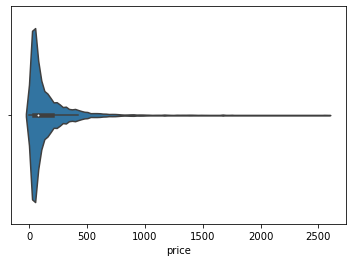

In [8]:
sns.violinplot(x=df[df['category_code'].isnull()]['price'])
#sns.boxplot(x=df[df['category_code'].isnull()]['price'])

In [9]:
# Se eliminan los registros con category_code nulo.
df.drop(df[df['category_code'].isnull() == True].index, inplace=True)
display_html(df.head().style.hide_index())

event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_month,event_day,event_hour
view,1004767,2053013555631882655,electronics.smartphone,samsung,243.220000,564343135,76be743b-f5cd-47a2-82eb-b489597df6ba,10,29,7
view,1307059,2053013558920217191,computers.notebook,apple,1569.920000,549727626,022640cb-f45a-4e76-9ade-3eeec65d7837,10,18,14
view,1005160,2053013555631882655,electronics.smartphone,xiaomi,212.120000,535374900,a4ee5bfa-3824-4f66-87fb-0d0ae358f307,10,31,2
view,1801874,2053013554415534427,electronics.video.tv,kivi,463.310000,531278066,21407301-47e7-4c20-8dd9-4095fa2b2e22,10,17,6
view,1004856,2053013555631882655,electronics.smartphone,samsung,130.990000,566187109,658f1874-588d-403e-b46d-f884e04eac27,10,31,16


# Se divide la columna *caterogy code*.
La columna category code es un árbol de categorías que se separa en columnas diferentes para un posterior tratamiento.

In [10]:
df_categories = df['category_code'].str.split('.', expand=True)  # Se crea un dataframe para categorias
n_categories = df_categories.shape[1]                            # Cantidad de categorías encontradas

# Se crea una lista con los niveles
category_level = []                                             
for k in range(n_categories):
  category_level.append('L'+str(k))

df_categories.columns = category_level                           # Se asignan los nombres  de los niveles a las columnas df_categories
df = pd.concat([df, df_categories], axis=1)                      # Se concatena el dataframe original con el dataframe categories
df.drop(columns='category_code', inplace=True)                   # Se elimina la columna de categorias del dataframe
display_html(df.head().style.hide_index())

event_type,product_id,category_id,brand,price,user_id,user_session,event_month,event_day,event_hour,L0,L1,L2,L3
view,1004767,2053013555631882655,samsung,243.220000,564343135,76be743b-f5cd-47a2-82eb-b489597df6ba,10,29,7,electronics,smartphone,None,None
view,1307059,2053013558920217191,apple,1569.920000,549727626,022640cb-f45a-4e76-9ade-3eeec65d7837,10,18,14,computers,notebook,None,None
view,1005160,2053013555631882655,xiaomi,212.120000,535374900,a4ee5bfa-3824-4f66-87fb-0d0ae358f307,10,31,2,electronics,smartphone,None,None
view,1801874,2053013554415534427,kivi,463.310000,531278066,21407301-47e7-4c20-8dd9-4095fa2b2e22,10,17,6,electronics,video,tv,None
view,1004856,2053013555631882655,samsung,130.990000,566187109,658f1874-588d-403e-b46d-f884e04eac27,10,31,16,electronics,smartphone,None,None


# ¿Qué es lo más representado dentro del dataset?
Sin distinguir por tipo de evento

In [11]:
df[df['L0']== 'electronics']['L1'].value_counts(normalize=True)

smartphone   0.719
audio        0.100
clocks       0.076
video        0.067
tablet       0.019
telephone    0.016
camera       0.002
Name: L1, dtype: float64

Se observa que, dentro de electrónica, el 72% son smartphones.

# ¿Qué es lo más visto/puesto en carrito/comprado en Octubre?
Se analiza el top 10 de categoría L0, L1 en: visto, carrito y compra de todo el dataset.

In [12]:
df_views = df[df['event_type'] == 'view'].copy()
df_carts = df[df['event_type'] == 'cart'].copy()
df_purchase = df[df['event_type'] == 'purchase'].copy()

In [13]:
top_values = 10
df_views[['L0', 'L1']].value_counts(normalize=True).head(top_values)

L0            L1         
electronics   smartphone    0.388
appliances    kitchen       0.118
electronics   audio         0.057
              clocks        0.045
appliances    environment   0.042
apparel       shoes         0.041
computers     notebook      0.039
electronics   video         0.039
auto          accessories   0.036
construction  tools         0.025
dtype: float64

A continuación se presenta esta información por vista, carrito y compras.

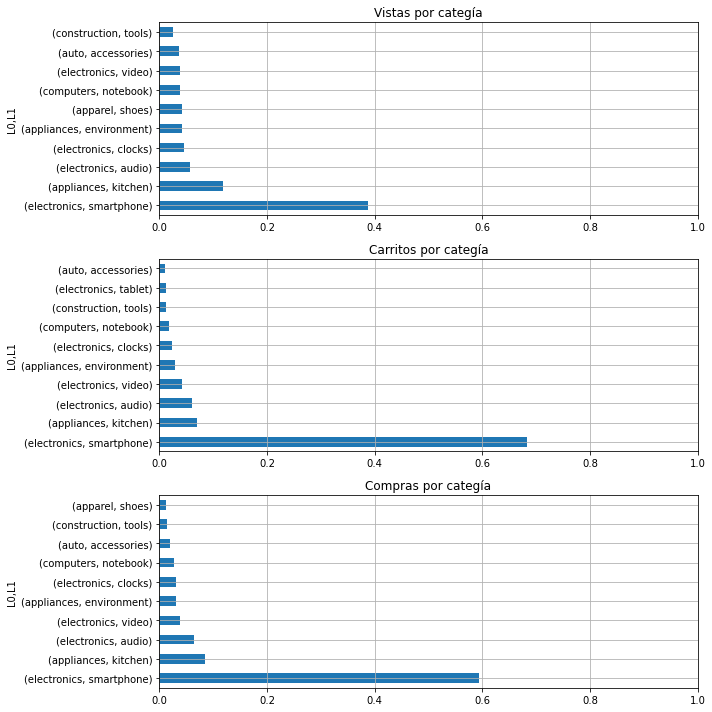

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,10))
df_views[['L0', 'L1']].value_counts(normalize=True).head(top_values).plot(kind='barh', ax=axes[0], title='Vistas por categía', grid='both', xlim=[0, 1])
df_carts[['L0', 'L1']].value_counts(normalize=True).head(top_values).plot(kind='barh', ax=axes[1], title='Carritos por categía', grid='both', xlim=[0, 1])
df_purchase[['L0', 'L1']].value_counts(normalize=True).head(top_values).plot(kind='barh', ax=axes[2], title='Compras por categía',  grid='both', xlim=[0, 1])
fig.tight_layout()

Nos centraremos en smartphones ya que es la categoría más representada en vistas/carrito y compras.

# Dataframe Smartphones

In [15]:
df_smartphones = df[df['L1'] == 'smartphone'].copy()
display_html(df_smartphones.head().style.hide_index())

event_type,product_id,category_id,brand,price,user_id,user_session,event_month,event_day,event_hour,L0,L1,L2,L3
view,1004767,2053013555631882655,samsung,243.220000,564343135,76be743b-f5cd-47a2-82eb-b489597df6ba,10,29,7,electronics,smartphone,None,None
view,1005160,2053013555631882655,xiaomi,212.120000,535374900,a4ee5bfa-3824-4f66-87fb-0d0ae358f307,10,31,2,electronics,smartphone,None,None
view,1004856,2053013555631882655,samsung,130.990000,566187109,658f1874-588d-403e-b46d-f884e04eac27,10,31,16,electronics,smartphone,None,None
view,1004748,2053013555631882655,huawei,130.480000,518371987,1da435bd-e863-4248-839d-10a7befedfc2,10,15,8,electronics,smartphone,None,None
view,1005203,2053013555631882655,xiaomi,113.770000,563869128,df5abde3-35fa-47a9-a743-5a656ce9f63d,10,26,19,electronics,smartphone,None,None


# Limpieza de duplicados
Se eliminan todas aquellas filas que coinciden en todas sus columnas.

In [16]:
df.drop_duplicates(inplace=True)

## Outliers
Outliers de precio en la sección de smartphones

event_type,product_id,category_id,brand,price,user_id,user_session,event_month,event_day,event_hour,L0,L1,L2,L3
view,1004767,2053013555631882655,samsung,243.220000,564343135,76be743b-f5cd-47a2-82eb-b489597df6ba,10,29,7,electronics,smartphone,None,None
view,1005160,2053013555631882655,xiaomi,212.120000,535374900,a4ee5bfa-3824-4f66-87fb-0d0ae358f307,10,31,2,electronics,smartphone,None,None
view,1004856,2053013555631882655,samsung,130.990000,566187109,658f1874-588d-403e-b46d-f884e04eac27,10,31,16,electronics,smartphone,None,None
view,1004748,2053013555631882655,huawei,130.480000,518371987,1da435bd-e863-4248-839d-10a7befedfc2,10,15,8,electronics,smartphone,None,None
view,1005203,2053013555631882655,xiaomi,113.770000,563869128,df5abde3-35fa-47a9-a743-5a656ce9f63d,10,26,19,electronics,smartphone,None,None


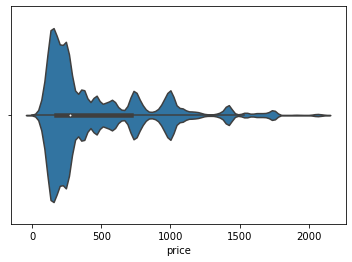

In [17]:
sns.violinplot(x=df_smartphones['price'])
q1=df_smartphones['price'].quantile(0.25)
q3 = df_smartphones['price'].quantile(0.75)
iqr = q3 - q1
outlier_threshold = q3 + (iqr *1.5)
# Nos quedamos con aquellos smatphones por debajo del thershold definido.
df_smartphones = df_smartphones[df_smartphones['price'] < outlier_threshold]
display_html(df_smartphones.head().style.hide_index())

# Vistas/Carritos/Compras 
A continuación se analiza la cantidad de vistas, carritos y compras en el dataframe smartphones. Luego, se representarán el *event_type* por día.

In [18]:
df_smartphones['event_type'].value_counts(normalize=True)

view       0.852
cart       0.085
purchase   0.064
Name: event_type, dtype: float64

Acá se observa que hay más carritos que compras. Esto puede deberse a que el dataset *smallsampled* fuer "mal muestreado"

# Smartphone Views: 1421147
# Smartphone Carts: 141085
# Smartphone Purchase: 106758

view        1421147
cart         141085
purchase     106758
Name: event_type, dtype: int64



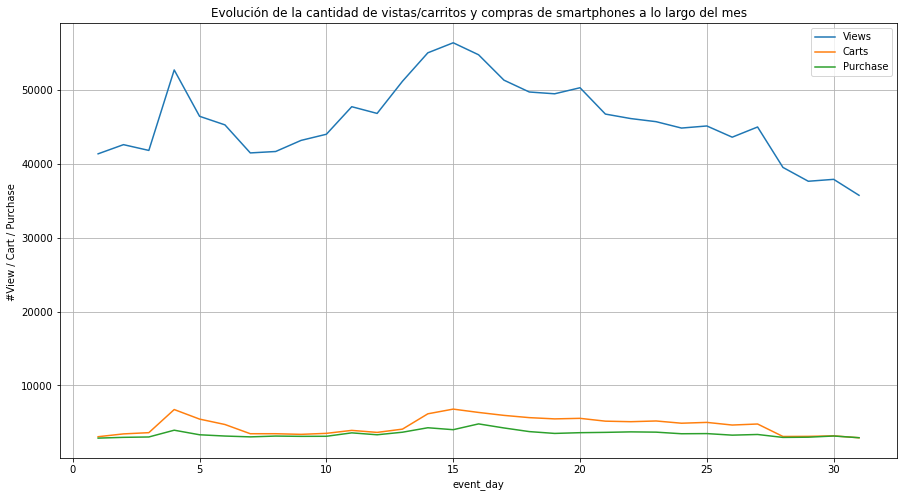

In [19]:
# Se representan vistas/carritos y compras de smartphones x día.
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,8))
df_smartphones[df_smartphones['event_type'] == 'view'].groupby('event_day').size().plot(ax=axes, label='Views')
df_smartphones[df_smartphones['event_type'] == 'cart'].groupby('event_day').size().plot(ax=axes, label='Carts')
df_smartphones[df_smartphones['event_type'] == 'purchase'].groupby('event_day').size().plot(ax=axes, label='Purchase')
axes.set_ylabel('#View / Cart / Purchase ')
axes.grid(which='both')
axes.legend()
axes.set_title('Evolución de la cantidad de vistas/carritos y compras de smartphones a lo largo del mes')

# Chequeo básico de que la suma de vistas/carritos y compras de todos los días 
# se corresponda con lo obtenido en el value_counts
print('# Smartphone Views: {:d}'.format(sum(df_smartphones[df_smartphones['event_type'] == 'view'].groupby('event_day').size())))
print('# Smartphone Carts: {:d}'.format(sum(df_smartphones[df_smartphones['event_type'] == 'cart'].groupby('event_day').size())))
print('# Smartphone Purchase: {:d}'.format(sum(df_smartphones[df_smartphones['event_type'] == 'purchase'].groupby('event_day').size())))
print('\r')
print(df_smartphones['event_type'].value_counts())
print('\r')

***TODO***: Al gráfico anterior, probablemente convenga representarlo en porcentual, de manera de no perderse en la cantidad absoluta.

In [20]:
# cantidad de marcas diferentes dentro del dataframe de smartphones
df_smartphones['brand'].nunique()

40

In [21]:
df_smartphones['brand'].value_counts(normalize=True)

samsung      0.354
apple        0.272
xiaomi       0.187
huawei       0.086
oppo         0.042
meizu        0.012
vivo         0.010
nokia        0.006
honor        0.005
sony         0.005
oneplus      0.005
tp-link      0.002
lg           0.002
bq           0.002
doogee       0.002
prestigio    0.001
inoi         0.001
haier        0.001
google       0.001
zte          0.001
tecno        0.000
asus         0.000
jinga        0.000
gionee       0.000
htc          0.000
irbis        0.000
blackberry   0.000
umi          0.000
fly          0.000
nubia        0.000
texet        0.000
leeco        0.000
vertex       0.000
philips      0.000
micromax     0.000
oukitel      0.000
leagoo       0.000
ark          0.000
hiper        0.000
motorola     0.000
Name: brand, dtype: float64

In [22]:
# Existen marcas que no son muy representadas; por lo tanto, lo que se hace es 
# retener las primeras 5 marcas y al resto se las agrupa en "others"
brand_to_retain = df_smartphones['brand'].value_counts(normalize=True)[:5].index.to_list()
df_smartphones.loc[~(df_smartphones['brand'].isin(brand_to_retain)), 'brand'] = 'others'
df_smartphones['brand'].value_counts(normalize=True)

samsung   0.353
apple     0.271
xiaomi    0.187
huawei    0.086
others    0.061
oppo      0.041
Name: brand, dtype: float64

Veamos el tipo de evento, por marca, por día.

In [23]:
df_smartphones_view = df_smartphones[df_smartphones['event_type'] == 'view']
df_smartphones_cart = df_smartphones[df_smartphones['event_type'] == 'cart']
df_smartphones_purchase = df_smartphones[df_smartphones['event_type'] == 'purchase']

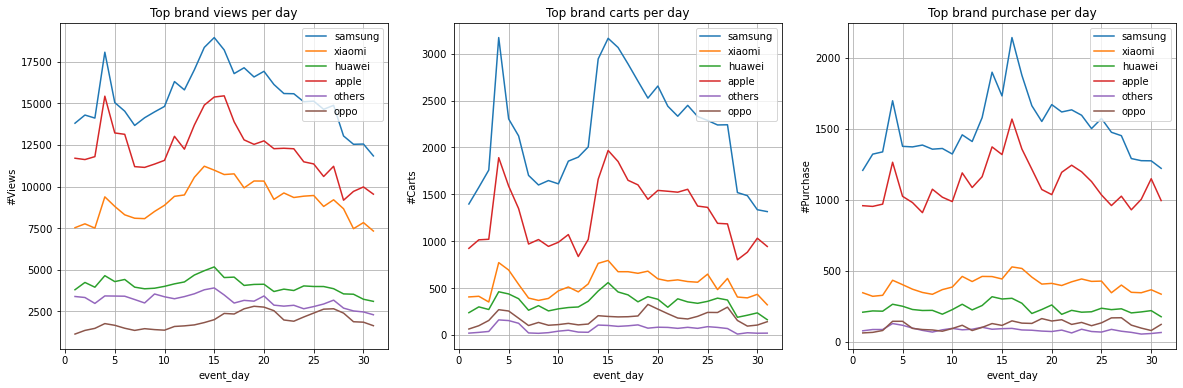

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))
for k in (df_smartphones['brand'].unique()):  
  df_smartphones_view[df_smartphones_view['brand'] == k].groupby('event_day').size().plot(label=k, 
                                                                                          ax=axes[0], 
                                                                                          ylabel='#Views', 
                                                                                          grid='both', 
                                                                                          legend=True,
                                                                                          title='Top brand views per day')
  df_smartphones_cart[df_smartphones_cart['brand'] == k].groupby('event_day').size().plot(label=k, 
                                                                                          ax=axes[1], 
                                                                                          ylabel='#Carts', 
                                                                                          grid='both', 
                                                                                          legend=True,
                                                                                          title='Top brand carts per day')
  df_smartphones_purchase[df_smartphones_purchase['brand'] == k].groupby('event_day').size().plot(label=k, 
                                                                                                  ax=axes[2], 
                                                                                                  ylabel='#Purchase', 
                                                                                                  grid='both', 
                                                                                                  legend=True,
                                                                                                  title='Top brand purchase per day')


Se observa en las dos primeras marcas (samsung y apple) que las vistas, carritos y compras suelen tener lugar a inicio y mitad de mes. <br>
A continuación veremos el tipo de evento, por marca, por hora.

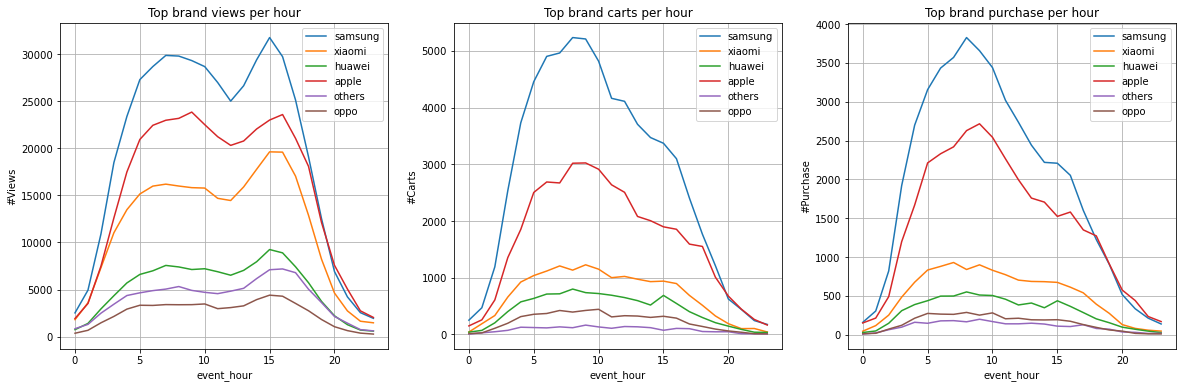

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))
for k in (df_smartphones['brand'].unique()):  
  df_smartphones_view[df_smartphones_view['brand'] == k].groupby('event_hour').size().plot(label=k, 
                                                                                          ax=axes[0], 
                                                                                          ylabel='#Views', 
                                                                                          grid='both', 
                                                                                          legend=True,
                                                                                          title='Top brand views per hour')
  df_smartphones_cart[df_smartphones_cart['brand'] == k].groupby('event_hour').size().plot(label=k, 
                                                                                          ax=axes[1], 
                                                                                          ylabel='#Carts', 
                                                                                          grid='both', 
                                                                                          legend=True,
                                                                                          title='Top brand carts per hour')
  df_smartphones_purchase[df_smartphones_purchase['brand'] == k].groupby('event_hour').size().plot(label=k, 
                                                                                                  ax=axes[2], 
                                                                                                  ylabel='#Purchase', 
                                                                                                  grid='both', 
                                                                                                  legend=True,
                                                                                                  title='Top brand purchase per hour')

# Qué sería bueno agregar (de mínima):
- Cantidad de vistas/carrito/compras por id de usuario y sesión
- Relación entre *smartphones* y *computers*

# Análisis y exploración de usuarios
Se busca en el dataset aquellos smartphones que coinciden en id de producto y en sesión de usuario (se considera que el id de usuario puede cambiar)

In [26]:
top_clients = 10
#df_smartphones[df_smartphones['event_type']=='purchase']['user_session'].value_counts().head(top_clients)
df_smartphones[df_smartphones['event_type']=='purchase']['user_session'].nunique

<bound method IndexOpsMixin.nunique of 8685924     79976ba6-b513-4fac-b493-52fc4e4b464c
7693290     5436c7ca-d81f-4dd8-b5e3-9b6d651cd554
37677569    7b3e6578-da11-48f1-9733-d1a7bff76ff6
35067524    312b2bdf-a0bd-4205-9f55-8c4d7f596cb2
35384263    39696d58-5c02-4e7b-9549-e331b0e7199c
                            ...                 
42445732    371c4d85-d114-4da4-9f17-d902ea47f7ca
42445908    371c4d85-d114-4da4-9f17-d902ea47f7ca
42446893    ce520a95-f8eb-4c7a-9999-20eb12d26305
42447302    3c70d8b4-6c15-4938-8e90-66f76ca85857
42448362    3a5a3b01-2ab1-4a1d-a202-30d336e0057b
Name: user_session, Length: 106758, dtype: object>

In [27]:
df_smartphones[df_smartphones['event_type']=='purchase']['user_id'].nunique

<bound method IndexOpsMixin.nunique of 8685924     549310645
7693290     552481367
37677569    560390584
35067524    564275399
35384263    553665566
              ...    
42445732    559242302
42445908    559242302
42446893    560068016
42447302    519641980
42448362    533892594
Name: user_id, Length: 106758, dtype: int64>

In [28]:
df_smartphones[df_smartphones['user_session'] == '3a5a3b01-2ab1-4a1d-a202-30d336e0057b'].head()

,event_type,product_id,category_id,brand,price,user_id,user_session,event_month,event_day,event_hour,L0,L1,L2,L3
42447322,view,1004240,2053013555631882655,apple,1054.600,533892594,3a5a3b01-2ab1-4a1d-a202-30d336e0057b,10,31,23,electronics,smartphone,None,None
42447502,view,1004240,2053013555631882655,apple,1054.600,533892594,3a5a3b01-2ab1-4a1d-a202-30d336e0057b,10,31,23,electronics,smartphone,None,None
42447965,view,1004240,2053013555631882655,apple,1054.600,533892594,3a5a3b01-2ab1-4a1d-a202-30d336e0057b,10,31,23,electronics,smartphone,None,None
42448005,view,1003317,2053013555631882655,apple,928.180,533892594,3a5a3b01-2ab1-4a1d-a202-30d336e0057b,10,31,23,electronics,smartphone,None,None
42448036,view,1003317,2053013555631882655,apple,928.180,533892594,3a5a3b01-2ab1-4a1d-a202-30d336e0057b,10,31,23,electronics,smartphone,None,None


In [29]:
unique_sessions = duplicate_pid_uid_us['user_session'].unique()
# Se recorren las sesiones de usuario únicas
for k in range(len(unique_sessions)):
  # Para aquellas sesiones que tienen más de 1 registro, se computa:
  #   - cantidad de vistas, 
  #   - cantidad de carrito y 
  #   - cantidad de compras
  if duplicate_pid_uid_us[duplicate_pid_uid_us['user_session'] == unique_sessions[k]].shape[0] > 1:
      df_user = duplicate_pid_uid_us[duplicate_pid_uid_us['user_session'] == unique_sessions[k]]
      n_views = df_user[df_user['event_type'] == 'view'].shape[0]
      n_carts = df_user[df_user['event_type'] == 'cart'].shape[0]
      n_purchase = df_user[df_user['event_type'] == 'purchase'].shape[0]

      #if (n_views  == 0) and (n_carts >= 1) and (n_purchase == 0):
      if (n_views  == 0) and (n_carts == 0) and (n_purchase >= 1):
        print('uid: {:d}, pid: {:d}, cat: {:s}, brand: {:s}, price: {:.2f}, views: {:d}, carts: {:d}, purchase: {:d}'.
              format(df_user['user_id'].iloc[0],
                    df_user['product_id'].iloc[0],
                    df_user['L1'].iloc[0],
                    df_user['brand'].iloc[0],
                    df_user['price'].iloc[0],
                    n_views,
                    n_carts,
                    n_purchase))
      

NameError: name 'duplicate_pid_uid_us' is not defined